In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
plt.rcParams["figure.figsize"] = (10,10)

Populating the interactive namespace from numpy and matplotlib


2D Ising Lattice Gauge Hamiltonian:
$
H = \sum_p \Pi_{i\in p} \sigma^z_i
$

In [15]:
'''
    Hamiltonian:
    H = \sum_p \Pi \sigma_p
    
    - s - - - s - - - s - - - s -
          |       |       |
          s i,j+1 s (...) s 
          |       |       |
    - s - - - s - - - s - - - s -
          |       |       |
          s  i,j  s i+1,j s 
          |       |       |
    - s - - - s - - - s - - - s -
          |       |       |
          s       s       s

'''
# number of sites
N=5
J=1.

In [16]:
def initialize(ground_state=False):
    '''
    Initializes a random spin configuration on a square lattice
    i,j denotes the plaquette to the right / up from vertex i,j and xy usually denotes
        the spin at + x/2 or + y/2 to the center.

    Returns 
    -------
    Random spin configuration with format NxNx2 where
    '''

    if ground_state:
        spins = 2*np.ones((N,N,2))
        spins[:,:,0]*=-1
    else:
        spins = 2*np.random.randint(2, size=((N, N,2))) - np.ones((N,N,2))
    return spins

In [22]:
def plaquette_update(spins):
    '''
    performs a vertex update, i.e., flipps all the spins around the plaquette (i,j)
    Since this update does not change the energy, it's performed with probability 1.
    '''
    
    # pick a vertex
    i,j = random.randint(N, size=2)
    print(i,j)
    i_left = (i+N-1)%N
    j_up = (N+j-1)%N
    # and flip every spin connected to it
    spins[i, j,0]*=-1
    spins[i, j,1]*=-1
    spins[i_left, j,0]*=-1
    spins[i, j_up,1]*=-1

In [18]:
def plot_configuration(spins, dual=False):
    '''
    
    this is just a helper function to plot the configuration of spins  given by 'spins'
    note that (i,j) denotes a vertex coordinate, such that the location of the plaquette
    center is at (i+0.5, j+0.5) and thus, the x spin is at (i+1, j+0.5) etc.
    
    Parameters
    ----------
    spins  :  int
        spin configuration, dimension is NxNx2
    dual   :  bool
        Plot the configuration in dual space or not. Default is False.
    '''
    N = np.shape(spins)[1]
    fig, ax = plt.subplots()
    fig.add_axes()
    ax = fig.axes[0]
    for i in range(N+1):
        ax.plot([i, i], [0,N], 'k')
        ax.plot([0,N], [i,i], 'k')
    
    if not dual:
        colors = ['b', 'r'] # note: blue is down, red is up!
        for i in range(N):
            fig.gca().add_patch(plt.Circle((0,i+0.5), radius=0.2, fc=colors[int((spins[-1,i,0]+1)/2.)]))
            fig.gca().add_patch(plt.Circle((i+0.5,0), radius=0.2, fc=colors[int((spins[i,-1,1]+1)/2.)]))
            for j in range(N):
                fig.gca().add_patch(plt.Circle((i+1,j+0.5), radius=0.2, fc=colors[int((spins[i,j,0]+1)/2.)]))
                fig.gca().add_patch(plt.Circle((i+0.5,j+1), radius=0.2, fc=colors[int((spins[i,j,1]+1)/2.)]))
    
    if dual:
        excitation = []
        for i in range(N):
            if spins[-1, i,0]==1: ax.plot([-0.5, 0.5], [i+0.5, i+0.5], 'b', lw=3)
            if spins[i, -1,1]==1: ax.plot([i+0.5, i+0.5], [-0.5, 0.5], 'b', lw=3)
            for j in range(N):
                j_up = (N+j-1)%N
                i_left = (i+N-1)%N
                if spins[i,j,0]==1: ax.plot([i+0.5, i+1.5], [j+0.5, j+0.5], 'b', lw=3)
                if spins[i,j,1]==1: ax.plot([i+0.5, i+0.5], [j+0.5, j+1.5], 'b', lw=3)
                if spins[i,j, 0]*spins[i_left, j, 0]*spins[i,j,1]*spins[i,j_up, 1]==-1: excitation.append([i+0.5,j+0.5])
        if len(excitation)>0: plt.scatter(np.array(excitation)[:,0], np.array(excitation)[:,1], color='red', s=350, marker=(5,1))
    ax.set_ylim(-1,N+1)
    ax.set_xlim(-1,N+1)
    ax.set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    fig.show()

In [23]:
config = initialize(ground_state=True)

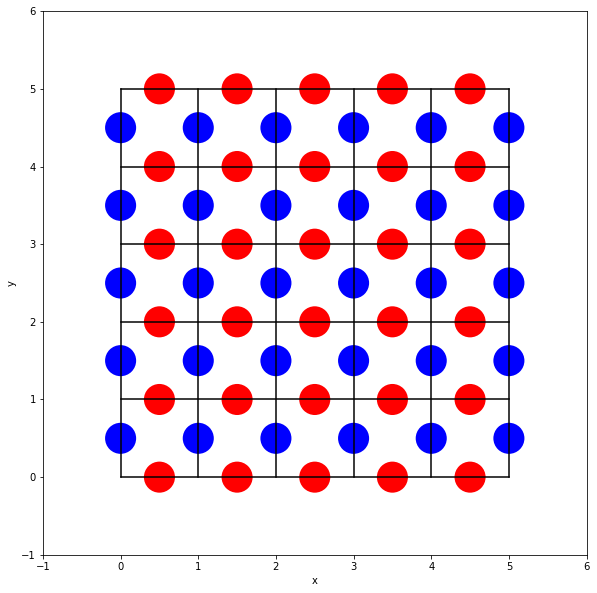

In [24]:
plot_configuration(config)

(1, 3)


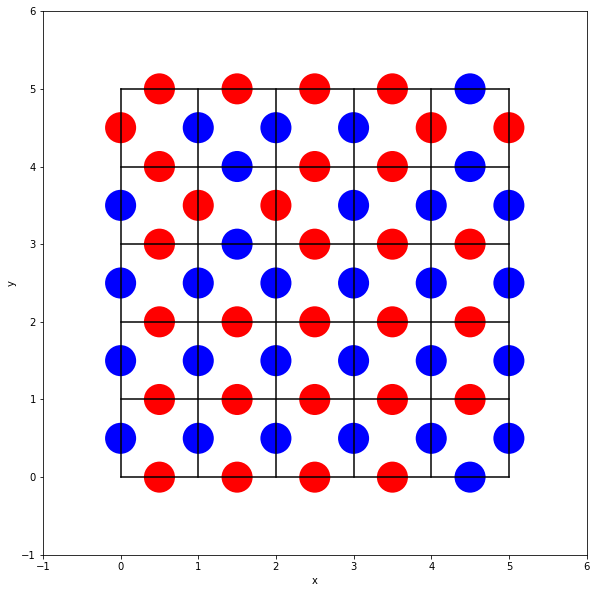

In [26]:
plaquette_update(config)
plot_configuration(config)

In [27]:
configs = np.loadtxt("configs.txt")
#labels = np.loadtxt("labels.txt")

In [28]:
Nc = int(np.sqrt(len(configs[0])/2))

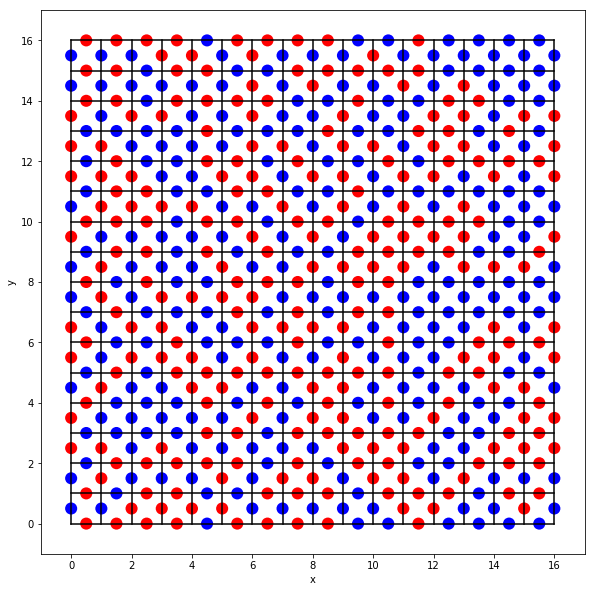

In [29]:
plot_configuration(np.reshape(configs[0], (Nc, Nc, 2)))

In [24]:
total_energy(np.reshape(configs[0], (Nc, Nc, 2)))

-256.0